# Social Sensing 1

There are a lot of social, cultural and other datasets out there on the web. We have already learned how to extract data from web sites directly. 

Many data items can also be accessed via a so-called API (Application Programming Interface). You can think of an API as a window through which you have access to remotely stored data rather than web pages. Often access to these APIs is limited by some kind of registration key you have to use to open that window. 

First, we will use data from https://www.data.gov/, which is 'the home of the U.S. Government’s open data'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sca
from ipynb.fs.full.keys import *

To call an API in Python and access data from a website we need the requests package first.  Please, import it with `import requests`.

In [2]:
import requests

You can think of the API calls we are doing as a direct way of accessing the data behind the web pages you see in your browser. As a taste go to a browser window, and paste the following URL: https://developer.nrel.gov/api/utility_rates/v3.json?api_key=DEMO_KEY&address=1600+Amphitheatre+Parkway%2C+Mountain+View%2C+CA

What do you see? You should see details about an address in the United States '1600 Amphitheatre Parkway, Mountain View, CA'. What you see is the JSON format, which is a way of transmitting data rather than websites. According to https://en.wikipedia.org/wiki/JSON, JSON describes'data objects consisting of attribute–value pairs'. For instance, you should see something like "address":"1600 Amphitheatre Parkway, Mountain View, CA", which defines the address. It looks a bit like a Python dictionary. 

Next we need to open a session with request. Type in `S = requests.Session()`.

In [3]:
S = requests.Session()

Then, we define the URL we have to address with our call, which is everything before the ? in the URL above. So, type in `URL = 'https://developer.nrel.gov/api/utility_rates/v3.json'`.

In [4]:
URL = 'https://developer.nrel.gov/api/utility_rates/v3.json'

We want to play with electricity rates and associated coordinate information for US locations. Let’s first define a place we are interested in.  

For our requests call, we next need a number of parameters like the location we are interested in. We also need the API key, which is something we will come back to later again when we look at Twitter. It is basically a way of authenticating our requests. For playing with data.gov, we can use the DEMO_KEY.

Run:
```
PARAMS = {
    "address": "1600 Amphitheatre Parkway, Mountain View, CA",
    "api_key": 'DEMO_KEY'
}
```

In [5]:
PARAMS = {
    "address": "1600 Amphitheatre Parkway, Mountain View, CA",
    "api_key": 'DEMO_KEY'
}

Do you know who ‘lives’ at this address? 

Next we run the actual request, which is called a get-request, because we want to retrieve data. We can also 'put' data with a put request, if we have the right access. For the call `R = S.get(url=URL, params=PARAMS, verify=False)`, we need the URL and PARAMS as parameters. We also say verify=False, as we are just experimenting and don't need verification. Please, ignore any warning you might get.

In [6]:
R = S.get(url=URL, params=PARAMS, verify=False)

/usr/local/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'developer.nrel.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Request has a json() function that can easily translate the received JSON into a Python object. Run:
```
DATA = R.json()
DATA
```

In [7]:
DATA = R.json()
DATA

{'inputs': {'address': '1600 Amphitheatre Parkway, Mountain View, CA'},
 'errors': [],
 'warnings': [],
 'version': '3.1.0',
 'metadata': {'sources': ['Ventyx Research (2012)']},
 'outputs': {'company_id': '14328',
  'utility_name': 'Pacific Gas & Electric Co',
  'utility_info': [{'company_id': '14328',
    'utility_name': 'Pacific Gas & Electric Co'}],
  'commercial': 0.1408,
  'industrial': 0.0898,
  'residential': 0.1559}}

It seems we got no errors and that we learned quite a bit about the utilities at the locations we are interested. This is because the data actually comes from https://nrel.gov/. 

Unfortunately, the result is a rather complex structure still. It is a dictionary of dictionaries. But we know how to access the individual elements. Type `DATA['outputs']['utility_name']` to print out what? Do you remember how we use dictionaries?

In [8]:
DATA['outputs']['utility_name']

'Pacific Gas & Electric Co'

This way, we got the utitility name. Try now to get the residential electricity rate at the address, look for outputs and then residential. Tip: you need to replace 'utility_name' with 'residential'.

In [9]:
DATA['outputs']['residential']

0.1559

There are many useful APIs out there. Check out https://www.programmableweb.com/. Unfortunately, many are not as easy to access as data.gov. 

Let's check next the geo-locations for our address. You have of course already guessed that it is the location of the Googleplex, Google’s HQ. 

We will now repeat the same steps as above but with the wikipedia API. It really is always just the repetition of the same steps. 

Type in `URL = 'https://en.wikipedia.org/w/api.php'` to go to the Wikipedia API service

In [10]:
URL = 'https://en.wikipedia.org/w/api.php'

We are interested in the latitude and longitude of the Googleplex. 

To this end we need to give the API the following paramenter, which define the type of action, the format, the title of Wikipedia page and what it should return, the coordinates.

Run:
```
PARAMS = {
    "action": "query",
    "format": "json",
    "titles": "Googleplex",
    "prop": "coordinates"
}
```

In [11]:
PARAMS = {
    "action": "query",
    "format": "json",
    "titles": "Googleplex",
    "prop": "coordinates"
}

The cell is given to you, as it just exectures the requests and decodes the returned data.

In [12]:
#Keep cell

R = S.get(url=URL, params=PARAMS, verify=False)
DATA = R.json()
pages = DATA['query']['pages']
pages

/usr/local/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'en.wikipedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{'773423': {'pageid': 773423,
  'ns': 0,
  'title': 'Googleplex',
  'coordinates': [{'lat': 37.422,
    'lon': -122.084,
    'primary': '',
    'globe': 'earth'}]}}

The longitude and latitude are hidden in there somewhere. Print out the latitude with `pages['773423']['coordinates'][0]['lat']`. The first number might differ ...

In [13]:
pages['773423']['coordinates'][0]['lat']

37.422

You could now use https://www.latlong.net/Show-Latitude-Longitude.html to map these longitude and latitude and would find the Googleplex.

We have just worked through simple API requests that got us locations. More interesting will be to access social media applications like Twitter and Facebook. We can also get their data through APIs. Twitter is especially popular. 

In python there is a library that makes accessing Twitter data simple. Download and import tweepy.

In [14]:
import tweepy

In [15]:
if twit_key != '':
    consumer_key = twit_key
    consumer_secret = twit_secr
    access_token = twit_token

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    api = tweepy.API(auth, wait_on_rate_limit=True)
else:
    print('No api key available, skip next cell')

We are connected to Twitter and can run queries. Let’s get Barack Obama's timeline and his first tweet first

In [16]:
if twit_key != '':
    tweets = api.user_timeline(screen_name = 'BarackObama', count=100)
    first_tweet = tweets[0]

Let's check the first tweet of the dataset by typing first_tweet.text

In [17]:
if twit_key != '':
    print(first_tweet.text)
else:
    obama_tweets = pd.read_csv('obama_tweets.csv')
    first_tweet = obama_tweets.text[0]
    print(first_tweet)

This Veterans Day, I want to share Tom Voutsos's story. He served in the U.S. Marine Corps, and has continued to li… https://t.co/uEiwBot9K1


To see all the attributes of a tweet, simply type tweets[0], but for now we only want to check the date using first_tweet.created_at

In [18]:
if twit_key != '':
    print(first_tweet.created_at)
else:
    print(obama_tweets.iloc[0]['created_at'])

2021-11-11 14:15:05+00:00


Could we find a way to plot Obama his twitter activity?

TB: I would provide the following as a helper function and add it to sca.py where we should collect all the helper functions.

Then, just say please run 

<Figure size 432x288 with 0 Axes>

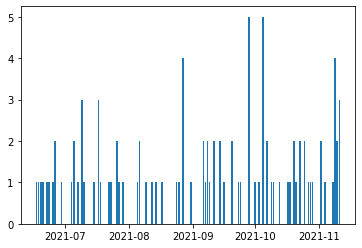

In [19]:
sca.plot_twitter_activity(tweets)

Let’s move on from Obama. In order to access my own Twitter favourites, please type in api.favorites('tobias_blanke')

In [20]:
if twit_key != '':
    favorites = api.favorites('tobias_blanke')
    favorite = favorites[0] 
    print(favorite.text)
else:
    print('not possible without key')

AttributeError: 'API' object has no attribute 'favorites'

So far, so good. Of course, these requests were quite simple. So, let’s try something more complicated. We start with first a look at the retweet structures and then a typical content analysis in Twitter. Tweets are little pieces of texts with lots of metadata attached to them (https://en.wikipedia.org/wiki/Twitter). So, it is not surprising that many people try and run text analysis on the content of tweets. Let’s start with that.

The first step is to search Twitter for something of interest by running api.search(q=‘#uva’, count = 10). This search will look for the most recent tweets (count=10) with the hashtag uva.

In [21]:
if twit_key != '':
    uva_tweets = api.search(q='#uva', count =10)
else:
    uva_tweets = pd.read_csv('uva_tweets.csv')

AttributeError: 'API' object has no attribute 'search'

As we can see each tweet has an id and a lot of other metadata attached to it such as retweets, locations, etc. Did you know that you produce so much information with each tweet?

There are a lot of things we can do with tweets and their metadata. Have a look at the documentation of the package or the many examples online. A quick example would be to return retweets. The first step is to find them. Looking at the metadata of each tweet in kcl_tweets, there are two relevant fields with retweet_count and retweeted. With retweet_count, we can check whether a tweet has been retweeted (retweet_count > 0), while retweeted tells us whether a tweet was a retweet itself. We want to find only those tweets that have not been retweets (retweeted == False) but are not a retweet. So, please select those kcl_tweets that have been retweeted. 

In [22]:
retweeted_uva_tweets = []
if twit_key != '':
    for uva_tweet in uva_tweets:
        if uva_tweet.retweeted == False and uva_tweet.retweet_count > 0:
            retweeted_uva_tweets.append(uva_tweet.text)
else:
    for index, row in uva_tweets.iterrows():
            if uva_tweets.iloc[index]['retweeted'] == False and uva_tweets.iloc[index]['retweet_count'] > 0:
                retweeted_uva_tweets.append(uva_tweets.iloc[index]['text'])
print(retweeted_uva_tweets)

NameError: name 'uva_tweets' is not defined

As promised, we would like to run some simple content analysis with the text in the tweets. We will produce a simple word cloud. But before we can do this we need to first create a corpus from the tweets, the same as we did with the speeches in the Text assignment.
Let's first extract the text from the uva_tweets.

In [23]:
tweet_text = []
if twit_key != '':
    for t in uva_tweets:
        text = t.text
        tweet_text.append(text)
else:
    for index, row in uva_tweets.iterrows():
        text = uva_tweets.iloc[index]['text']
        tweet_text.append(text)

NameError: name 'uva_tweets' is not defined

In [24]:
 sca.plot_wordcloud(tweet_text)

ValueError: We need at least 1 word to plot a word cloud, got 0.

Hmmm https shows up there pretty big, let's check if everything went alright. 
Print the tweets that we just added to the corpus.

In [ ]:
tweet = tweet_text[0]
print(tweet)

As we can see there is a link to the tweet in each text, we should have removed that first. We can use regular expressions for this.


In [ ]:
import re
tweet = re.sub(r'http\S+', '', tweet)
print(tweet)

In [ ]:
cleaned_tweets = []
for tweet in tweet_text:
    tweet = re.sub(r'http\S+', '', tweet) 
    cleaned_tweets.append(tweet)

cleaned_tweets   

In [ ]:
plot_wordcloud(cleaned_tweets)

Very popular with Twitter is also the analysis of followers. I don’t have so many. In fact, I am not really using Twitter much. But let’s still try. You can get my Twitter information by entering me = api.get_user(screen_name = 'tobias_blanke')

In [ ]:
if twit_key != '':
    me = api.get_user(screen_name = 'tobias_blanke')
    print(me.description)
else:
    print('not possible without key')

It’s me! My followers are a little bit more interesting. We can retrieve by going throug api.followers('tobias_blanke')

In [ ]:
# get first 20 followers

if twit_key != '':
    for follower in api.followers('tobias_blanke'): 
        print(follower.screen_name)
else:
    print('not possible without key')

I haven’t explained it yet, but Twitter limits the amount of API calls you can do at any moment in time, which is often an issue if you retrieve a lot of followers from accounts like Donalds Trump’s. Rate limits are often one of the biggest issues in Twitter analysis once the data gets a bit bigger. Check it out at https://dev.twitter.com/rest/public/rate-limiting. You will find plenty of people online who complain.

Which is also something that can happen while trying to access the information that we try to extract in this assignment, just in case that happens you can find a csv file with the same info in data.

Let's first get the ids of all the followers

In [ ]:
follower_list = sca.get_follower_list(me, twit_key=twit_key)

A key measure of my own importance on Twitter is the importance of the people who follow me. Does this make sense? Of course it does, as with important followers you can influence a lot of people. Let’s plot this measure and get an overview of the friends and followers of those who follow me. 
To do so we first want to create a dataframe that contains all my followers and their follower and friend count.

In [ ]:
# Create dataframe
# if no key is used it is already a dataframe

import pandas as pd

if twit_key != '':
    df = pd.DataFrame(columns=['user','follower'])
    df['follower'] = follower_list[0]
    df['user'] = tb_id
else:
    df = pd.read_csv('followers_tobias.csv')


In [ ]:
if twit_key != '':
    followers = follower_list[0]
    fol_count = sca.get_follower_count(followers, 200)
    df200 = df.head(200)
    df200['follower_count'] = fol_count
else:
    df200 = pd.read_csv('200_followers')

In [ ]:
df200

In [ ]:
if twit_key != '':
    followers = follower_list[0][:200]
    friends_count = sca.get_friends_count(user, followers)
    df200['friends_count'] = friends_count

In [ ]:
df200.plot.scatter(x='friends_count', y='follower_count',)

Ok, there are not too many strong performers in my followers’ list. In order to confirm this, let’s check the counts for all my followers with a plot. 

In [ ]:
counts = df200['follower_count'].to_list()
plt.hist(counts)

So, most of my followers do not have too many followers themselves apart from one outlier. My influence is really limited. Let’s quickly move on then.

Social network analysis is really important both in social and cultural analytics. It uses graphs to explain and analyse social relations. We have already started talking about social networks. We looked into my followers and those friends that I am following. Then, we investigated the friends of these friends and the followers of these followers. To build these kinds of relationships and map them onto graphs to visualise and analyse them is really what social networks are all about.

We would like to build a graph of my friends and followers. We already have the followers, let's now reterive their screen names.

Because graph visualisation can quickly get confusing if there are too many items to represent, we would like to limit the number of friends and followers to 20.

In [ ]:
if twit_key != '':
    sca.get_follower_count(followers,20)

In [ ]:
if twit_key != '':  
    df20 = df200.head(20)
    df20['screen_name_follower'] = screen_names
    df20['screen_name_user'] = api.get_user(tb_id).screen_name
else:
    df20 = pd.read_csv('20_followers')

In [ ]:
# Check the friends of user/source
get_friends_of20(me.id)

In [ ]:
if twit_key != '': 
    df_friends = pd.DataFrame(columns=['user','follower'])
    df_friends['user'] = friends
    df_friends['follower'] = tb_id
else:
    df_friends = pd.read_csv('df_friends.csv')


In [ ]:
if twit_key != '': 
    df_friends['screen_name_follower'] = api.get_user(tb_id).screen_name
    df_friends['screen_name_user'] = screen_name_friends
    df_friends['follower_count'] = len(followers)
    df_friends['friends_count'] = len(friends)

In [ ]:
if twit_key != '': 
    graphdata = pd.concat([df20,df_friends])
else:
    graphdata pd.read_csv('graphdata.csv')

In [ ]:
nodes = pd.DataFrame(columns=['userid', 'user_name'])
nodes['userid'] = graphdata.user.unique()
nodes['user_name'] = graphdata.screen_name_user.unique()

relations = pd.DataFrame(columns=['user', 'follower'])
relations['user'] = graphdata['user']
relations['follower'] = graphdata['follower']

In [ ]:
nodes

In [ ]:
import networkx as nx

G = nx.from_pandas_edgelist(relations,source='follower', target='user', create_using=nx.DiGraph())

node_attr = nodes.set_index('userid').to_dict('index')
nx.set_node_attributes(G, node_attr)
node_labels = nx.get_node_attributes(G, 'user_name')

nx.draw(G, with_labels=True, labels=node_labels)

In [ ]:
#And a function to plot the graph

# import igraph
# from igraph import *
# graph = Graph(directed=True)

In [ ]:
# graph = Graph.DictList(
#           vertices=nodes.to_dict('records'),
#           edges=relations.to_dict('records'),
#           directed=True,
#           vertex_name_attr='userid',
#           edge_foreign_keys=('follower', 'user'));

In [ ]:
# print(graph)

In [ ]:
# plot(graph, vertex_label=graph.vs['user_name'])